#Question 1

In [1]:
#Step 1. Import the necessary libraries
import pandas as pd
#column names
user_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
#Step 2. Import the dataset from this address.
#Step 3. Assign it to a variable called users
users = pd.read_table('http://bit.ly/movieusers', sep='|', header=None, names=user_cols)

In [2]:
# examine the first 5 rows
users.head(5)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [3]:
#Step 4. Discover what is the mean age per occupation
users.groupby('occupation').mean()

,user_id,age
occupation,,
administrator,430.949367,38.746835
artist,451.892857,31.392857
doctor,533.714286,43.571429
educator,466.905263,42.010526
engineer,456.328358,36.388060
entertainment,398.000000,29.222222
executive,422.312500,38.718750
healthcare,501.437500,41.562500
homemaker,443.000000,32.571429


In [4]:
#Step 5. Discover the Male ratio per occupation and sort it from the most to the least

users[users.gender =='M'].occupation.value_counts().sort_values(ascending=False)

student          136
educator          69
other             69
engineer          65
programmer        60
administrator     43
executive         29
scientist         28
technician        26
writer            26
librarian         22
entertainment     16
marketing         16
artist            15
retired           13
lawyer            10
salesman           9
doctor             7
healthcare         5
none               5
homemaker          1
Name: occupation, dtype: int64

In [5]:
#Step 6. For each occupation, calculate the minimum and maximum ages
users.groupby('occupation').age.agg(['min', 'max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [6]:
#Step 7. For each combination of occupation and sex, calculate the mean age
users.groupby(['occupation','gender']).age.agg(['mean'])


mean
occupation    gender           
administrator F       40.638889
              M       37.162791
artist        F       30.307692
              M       32.333333
doctor        M       43.571429
educator      F       39.115385
              M       43.101449
engineer      F       29.500000
              M       36.600000
entertainment F       31.000000
              M       29.000000
executive     F       44.000000
              M       38.172414
healthcare    F       39.818182
              M       45.400000
homemaker     F       34.166667
              M       23.000000
lawyer        F       39.500000
              M       36.200000
librarian     F       40.000000
              M       40.000000
marketing     F       37.200000
              M       37.875000
none          F       36.500000
              M       18.600000
other         F       35.472222
              M       34.028986
programmer    F       32.166667
              M       33.216667
retired       F       70.000000
              M       62.538462
salesman      F       27.000000
              M       38.555556
scientist     F       28.333333
              M       36.321429
student       F       20.750000
              M       22.669118
technician    F       38.000000
              M       32.961538
writer        F       37.631579
              M       35.346154

In [7]:
#Step 8. For each occupation present the percentage of women and men
users.groupby('gender').occupation.value_counts(normalize=True)

gender  occupation   
F       student          0.219780
        administrator    0.131868
        other            0.131868
        librarian        0.106227
        educator         0.095238
        writer           0.069597
        artist           0.047619
        healthcare       0.040293
        marketing        0.036630
        homemaker        0.021978
        programmer       0.021978
        none             0.014652
        executive        0.010989
        salesman         0.010989
        scientist        0.010989
        engineer         0.007326
        entertainment    0.007326
        lawyer           0.007326
        retired          0.003663
        technician       0.003663
M       student          0.202985
        educator         0.102985
        other            0.102985
        engineer         0.097015
        programmer       0.089552
        administrator    0.064179
        executive        0.043284
        scientist        0.041791
        technician       0

#Question 2

In [8]:
#Step 1. Import the necessary libraries
import pandas as pd
#Step 2. Import the dataset from this address
#Step 3. Assign it to a variable called euro12
euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv',sep=',')
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [9]:
#Step 4. Select only the Goal column
euro12["Goals"]

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [10]:
#Step 5. How many team participated in the Euro2012?

euro12.Team.nunique()

16

In [11]:
#Step 6. What is the number of columns in the dataset?
euro12.shape[1]

35

In [12]:
#Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
# Create DataFrame  

discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [13]:
#Step 8. Sort the teams by Red Cards, then to Yellow Cards
discipline.sort_values(by=['Red Cards', 'Yellow Cards'], inplace = True)
discipline

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [14]:
#Step 9. Calculate the mean Yellow Cards given per Team
discipline['Yellow Cards'].mean()

7.4375

In [15]:
#Step 10. Filter teams that scored more than 6 goals
euro12[euro12['Goals'] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [16]:
#Step 11. Select the teams that start with G
euro12[euro12.Team.str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [17]:
#Step 12. Select the first 7 columns
euro12.head(7)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [18]:
#Step 13. Select all columns except the last 3
euro12.iloc[:, :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [19]:
#Step 14. Present only the Shooting Accuracy from England, Italy and Russia
euro12.loc[euro12.Team.isin(['England', 'Italy', 'Russia']), ['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


#Question 3

In [20]:
#Step 1. Import the necessary libraries
import pandas as pd
import numpy as np

#tep 2. Create 3 differents Series, each of length 100, as follows:
#• The first a random number from 1 to 4
first_series = np.random.randint(1, 4, 100)
first_series


array([1, 2, 3, 3, 3, 3, 1, 3, 2, 3, 1, 2, 2, 2, 3, 1, 3, 3, 2, 2, 2, 3,
       1, 1, 2, 1, 1, 2, 2, 2, 2, 3, 3, 1, 3, 3, 3, 1, 1, 1, 1, 2, 3, 3,
       2, 2, 2, 2, 2, 3, 1, 1, 2, 2, 1, 2, 3, 3, 3, 1, 1, 3, 1, 1, 2, 1,
       1, 3, 2, 1, 1, 1, 2, 1, 3, 3, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 2,
       3, 2, 3, 1, 1, 3, 1, 2, 3, 1, 3, 3])

In [21]:
#• The second a random number from 1 to 3
second_series = np.random.randint(1, 3, 100)
second_series

array([2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1,
       2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2])

In [22]:
#• The third a random number from 10,000 to 30,000
third_series = np.random.randint(10000,30000,100)
third_series

array([24719, 10122, 24172, 21959, 20782, 19595, 18369, 26805, 25623,
       26297, 25236, 21313, 13634, 29847, 14143, 15443, 23735, 24869,
       10996, 25436, 22573, 13259, 20840, 15455, 26170, 23559, 17173,
       19319, 13624, 15836, 22576, 14767, 20672, 13479, 18488, 21649,
       23906, 28483, 20341, 15984, 28946, 14109, 28578, 26017, 22771,
       12803, 23693, 17141, 13566, 28895, 26675, 22179, 22909, 24751,
       25163, 25601, 15759, 21609, 14718, 12104, 29538, 17295, 26556,
       26463, 22111, 15527, 12732, 15706, 18614, 16290, 14498, 27884,
       12965, 10308, 15722, 23347, 10098, 24609, 19279, 20982, 21130,
       26884, 18225, 16429, 27569, 28854, 24797, 19185, 21426, 29151,
       29869, 15111, 13076, 10995, 27317, 24828, 24583, 17379, 15533,
       14089])

In [23]:
#Step 3. Create a DataFrame by joinning the Series by column
series = pd.DataFrame({'first_series':np.random.randint(1, 4,100), 'second_series':np.random.randint(1, 3, 100),'third_series':np.random.randint(10000, 30000, 100)})
series

,first_series,second_series,third_series
0,1,1,21188
1,2,2,15104
2,2,1,22833
3,2,1,21808
4,3,1,28859
...,...,...,...
95,2,2,26715
96,2,1,26936
97,2,1,29359
98,1,2,20547


In [24]:
#Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

data =[series["first_series"], series["second_series"], series["third_series"]]

headers = ["bedrs","bathrs","price_sqr_meter"]

df = pd.concat(data, axis=1, keys=headers)
df

,bedrs,bathrs,price_sqr_meter
0,1,1,21188
1,2,2,15104
2,2,1,22833
3,2,1,21808
4,3,1,28859
...,...,...,...
95,2,2,26715
96,2,1,26936
97,2,1,29359
98,1,2,20547


In [28]:
#Step 5. Create a one column DataFrame with the values of the 3 Series and assign it
#to 'bigcolumn'
#Step 6. Ops it seems it is going only until index 99. Is it true?
mydf = df.bedrs.astype(str).str.cat(df.bathrs.astype(str)).str.cat(df.price_sqr_meter.astype(str))
mydf.columns = ['bigcolumn']
mydf

0     1121188
1     2215104
2     2122833
3     2121808
4     3128859
       ...   
95    2226715
96    2126936
97    2129359
98    1220547
99    1218956
Name: bedrs, Length: 100, dtype: object

In [35]:
# Step 7. Reindex the DataFrame so it goes from 0 to 299
mydf.reset_index()
mydf.reindex(index=range(0,299))


0      1121188
1      2215104
2      2122833
3      2121808
4      3128859
        ...   
294        NaN
295        NaN
296        NaN
297        NaN
298        NaN
Name: bedrs, Length: 299, dtype: object

#Question4

In [36]:
#Step 1. Import the necessary libraries
#Step 2. Import the dataset from the attached file wind.txt
import pandas as pd
import numpy as np
import datetime as dt
data = pd.read_csv('/Users/farukfurkankoc/Desktop/wind.txt', delimiter= '\s+', index_col=False)
data

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [37]:
#Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index
data["Date"] = pd.to_datetime(data[["Yr","Mo","Dy"]].astype(str).agg('-'.join, axis=1))
data = data.drop(columns=["Yr","Mo","Dy"])
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Date
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,2061-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,2061-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,2061-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,2061-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,2061-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08,1978-12-27
6570,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46,1978-12-28
6571,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58,1978-12-29
6572,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79,1978-12-30


In [38]:
#Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
data["Date"] = np.where(pd.DatetimeIndex(data["Date"]).year < 2000,data.Date,data.Date - pd.offsets.DateOffset(years=100))
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Date
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1961-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1961-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1961-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1961-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08,1978-12-27
6570,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46,1978-12-28
6571,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58,1978-12-29
6572,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79,1978-12-30


In [39]:
#Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
set_data = data.set_index("Date")
set_data.index.astype("datetime64[ns]")

DatetimeIndex(['1961-01-01', '1961-01-02', '1961-01-03', '1961-01-04',
               '1961-01-05', '1961-01-06', '1961-01-07', '1961-01-08',
               '1961-01-09', '1961-01-10',
               ...
               '1978-12-22', '1978-12-23', '1978-12-24', '1978-12-25',
               '1978-12-26', '1978-12-27', '1978-12-28', '1978-12-29',
               '1978-12-30', '1978-12-31'],
              dtype='datetime64[ns]', name='Date', length=6574, freq=None)

In [40]:
#Step 6. Compute how many values are missing for each location over the entire record.
#They should be ignored in all calculations below.
print(set_data.isnull().values.ravel().sum())

31


In [41]:
#Step 7. Compute how many non-missing values there are in total.
count= set_data.count()
print("Total number of Non-missing values are :",count.sum())

Total number of Non-missing values are : 78857


In [42]:
#Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
#A single number for the entire dataset.
mean_windspeeds = set_data.mean()
mean_windspeeds.mean()

10.227982360836924

In [46]:
#Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean
#windspeeds and standard deviations of the windspeeds at each location over all the days
#A different set of numbers for each location.
def stats(x):
    x = pd.Series(x)
    Min = x.min()
    Max = x.max()
    Mean = x.mean()
    Std = x.std()
    res = [Min,Max,Mean,Std]
    indx = ["Min","Max","Mean","Std"]
    res = pd.Series(res,index=indx)
    return res
loc_stats = set_data.apply(stats)
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
Max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
Mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
Std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794


In [47]:
#Step 10. Create a DataFrame called day_stats and calculate the min, max and mean
#windspeed and standard deviations of the windspeeds across all the locations at each day.
#A different set of numbers for each day.
day_stats = set_data.apply(stats,axis=1)
day_stats

,Min,Max,Mean,Std
Date,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


In [49]:
#Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.
january_data = set_data[day_stats.index.month == 1]
print ("January windspeeds:")
print (january_data.mean())

January windspeeds:
RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64


In [50]:
#Step 12. Downsample the record to a yearly frequency for each location.
print( "Yearly:\n", set_data.resample('A').mean())

Yearly:
                   RPT        VAL        ROS       KIL        SHA       BIR  \
Date                                                                         
1961-12-31  12.299583  10.351796  11.362369  6.958227  10.881763  7.729726   
1962-12-31  12.246923  10.110438  11.732712  6.960440  10.657918  7.393068   
1963-12-31  12.813452  10.836986  12.541151  7.330055  11.724110  8.434712   
1964-12-31  12.363661  10.920164  12.104372  6.787787  11.454481  7.570874   
1965-12-31  12.451370  11.075534  11.848767  6.858466  11.024795  7.478110   
1966-12-31  13.461973  11.557205  12.020630  7.345726  11.805041  7.793671   
1967-12-31  12.737151  10.990986  11.739397  7.143425  11.630740  7.368164   
1968-12-31  11.835628  10.468197  11.409754  6.477678  10.760765  6.067322   
1969-12-31  11.166356   9.723699  10.902000  5.767973   9.873918  6.189973   
1970-12-31  12.600329  10.726932  11.730247  6.217178  10.567370  7.609452   
1971-12-31  11.273123   9.095178  11.088329  5.241507  

In [51]:
#Step 13. Downsample the record to a monthly frequency for each location.
print ("Monthly:", set_data.resample('M').mean())

Monthly:                   RPT        VAL        ROS       KIL        SHA        BIR  \
Date                                                                          
1961-01-31  14.841333  11.988333  13.431613  7.736774  11.072759   8.588065   
1961-02-28  16.269286  14.975357  14.441481  9.230741  13.852143  10.937500   
1961-03-31  10.890000  11.296452  10.752903  7.284000  10.509355   8.866774   
1961-04-30  10.722667   9.427667   9.998000  5.830667   8.435000   6.495000   
1961-05-31   9.860968   8.850000  10.818065  5.905333   9.490323   6.574839   
...               ...        ...        ...       ...        ...        ...   
1978-08-31   9.645161   8.259355   9.032258  4.502903   7.368065   5.935161   
1978-09-30  10.913667  10.895000  10.635000  5.725000  10.372000   9.278333   
1978-10-31   9.897742   8.670968   9.295806  4.721290   8.525161   6.774194   
1978-11-30  16.151667  14.802667  13.508000  7.317333  11.475000   8.743000   
1978-12-31  16.175484  13.748065  15.635161

In [54]:
#Step 14. Downsample the record to a weekly frequency for each location.
print ("Weekly:", set_data.resample('W').mean())

Weekly:                   RPT        VAL        ROS        KIL        SHA        BIR  \
Date                                                                           
1961-01-01  15.040000  14.960000  13.170000   9.290000        NaN   9.870000   
1961-01-08  13.541429  11.486667  10.487143   6.417143   9.474286   6.435714   
1961-01-15  12.468571   8.967143  11.958571   4.630000   7.351429   5.072857   
1961-01-22  13.204286   9.862857  12.982857   6.328571   8.966667   7.417143   
1961-01-29  19.880000  16.141429  18.225714  12.720000  17.432857  14.828571   
...               ...        ...        ...        ...        ...        ...   
1978-12-03  14.934286  11.232857  13.941429   5.565714  10.215714   8.618571   
1978-12-10  20.740000  19.190000  17.034286   9.777143  15.287143  12.774286   
1978-12-17  16.758571  14.692857  14.987143   6.917143  11.397143   7.272857   
1978-12-24  11.155714   8.008571  13.172857   4.004286   7.825714   6.290000   
1978-12-31  14.951429  11.801429

In [55]:
#Step 15. Calculate the min, max and mean windspeeds and standard deviations of the
#windspeeds across all locations for each week (assume that the first week starts on
#January 2 1961) for the first 52 weeks.
newdata = set_data.groupby(lambda d: (d.month, d.year))
print ("Mean of wind speed for each month in each location")
print (newdata.mean())

Mean wind speed for each month in each location
                  RPT        VAL        ROS       KIL        SHA        BIR  \
(1, 1961)   14.841333  11.988333  13.431613  7.736774  11.072759   8.588065   
(1, 1962)   14.783871  13.160323  12.591935  7.538065  11.779677   8.720000   
(1, 1963)   14.868387  11.112903  15.121613  6.635806  11.080645   7.835484   
(1, 1964)   12.661290  11.818387  11.741290  6.953548  11.400645   6.865806   
(1, 1965)   15.741613  15.546774  15.274194  8.258387  13.588065   9.251290   
...               ...        ...        ...       ...        ...        ...   
(12, 1974)  18.511290  17.805806  14.773871  9.734839  16.944194  10.153871   
(12, 1975)  11.655484   8.686774  11.217742  4.478387   6.628710   4.178065   
(12, 1976)  11.962258  10.086774  10.474516  3.383871   7.645484   6.148387   
(12, 1977)  14.751935  12.744839  13.469677  6.592258  11.247742   9.466774   
(12, 1978)  16.175484  13.748065  15.635161  7.094839  11.398710   9.241613   

   

In [56]:
print ("Min of wind speed for each month in each location")
print(newdata.min())

Min wind speed for each month in each location
             RPT    VAL   ROS   KIL   SHA   BIR   DUB   CLA   MUL   CLO  \
(1, 1961)   4.92   3.42  7.08  0.67  2.29  0.96  2.50  0.58  0.50  2.67   
(1, 1962)   0.67   3.13  2.96  0.87  0.42  0.33  2.17  0.00  0.54  0.92   
(1, 1963)   5.41   1.54  2.75  0.67  0.92  0.25  1.33  1.71  0.29  0.46   
(1, 1964)   1.87   3.04  3.79  0.50  4.04  0.71  1.92  0.75  0.46  0.46   
(1, 1965)   3.71   1.75  6.34  0.46  2.75  0.79  5.50  0.54  1.04  3.08   
...          ...    ...   ...   ...   ...   ...   ...   ...   ...   ...   
(12, 1974)  9.71  10.37  8.12  3.63  9.38  5.04  9.87  6.87  9.25  8.04   
(12, 1975)  2.21   0.54  3.08  0.33  0.54  0.00  5.33  0.08  1.83  0.92   
(12, 1976)  4.46   1.58  3.17  0.00  0.75  0.79  1.21  0.33  0.92  1.75   
(12, 1977)  4.92   2.21  5.09  1.13  2.37  1.71  2.67  1.25  1.33  0.67   
(12, 1978)  6.21   3.21  7.21  1.00  3.04  0.42  1.96  0.75  1.29  2.67   

              BEL    MAL  
(1, 1961)    5.25   5.17 

In [57]:
print ("Max of wind speed for each month in each location")
print(newdata.max())

Max of wind speed for each month in each location
              RPT    VAL    ROS    KIL    SHA    BIR    DUB    CLA    MUL  \
(1, 1961)   25.04  23.91  25.84  18.54  24.08  19.70  22.00  20.25  21.46   
(1, 1962)   31.13  26.54  26.25  18.25  23.09  17.25  25.96  17.00  19.79   
(1, 1963)   28.21  21.84  32.25  15.46  24.00  16.04  23.79  19.95  16.00   
(1, 1964)   33.34  28.50  24.37  28.46  23.50  20.33  22.92  25.92  18.71   
(1, 1965)   32.17  33.04  27.12  22.63  37.54  26.16  28.50  30.63  25.88   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
(12, 1974)  29.50  25.29  24.00  18.88  25.92  17.54  25.46  22.42  25.00   
(12, 1975)  26.96  22.08  24.41  14.33  19.55  12.92  17.79  16.88  16.25   
(12, 1976)  23.83  22.71  17.16   8.54  19.08  12.71  16.75  11.71  13.83   
(12, 1977)  26.20  24.87  24.17  11.67  22.71  21.34  24.08  21.84  17.88   
(12, 1978)  29.33  24.79  27.29  18.16  24.46  19.58  24.54  19.04  21.00   

              CLO    BEL 

In [58]:
print ("Standard deviations of wind speed for each month in each location")
print(newdata.std())

Standard deviations of wind speed for each month in each location
                 RPT       VAL       ROS       KIL       SHA       BIR  \
(1, 1961)   4.955164  4.807840  4.860355  4.926334  5.286289  4.662310   
(1, 1962)   7.767935  6.611289  5.675396  5.240164  6.530706  4.918774   
(1, 1963)   6.391997  5.593110  8.010511  4.258698  6.156008  4.837022   
(1, 1964)   7.287596  6.337325  5.217654  5.781760  5.254646  5.119961   
(1, 1965)   6.711159  7.016077  5.513951  4.821414  7.352860  5.655075   
...              ...       ...       ...       ...       ...       ...   
(12, 1974)  5.966778  4.556008  4.667964  3.746562  4.626266  3.329378   
(12, 1975)  5.694464  5.978940  5.144725  3.394562  4.807420  3.562498   
(12, 1976)  4.679669  4.966293  3.784768  2.093415  3.965161  3.139179   
(12, 1977)  5.774398  5.165709  4.897045  3.348480  4.792892  4.435551   
(12, 1978)  5.815363  6.457464  5.359712  4.424864  5.522910  5.082091   

                 DUB       CLA       MUL     

In [ ]:
#Question 5

In [59]:
#Step 1. Import the necessary libraries
#Step 2. Import the dataset from this address.
#Step 3. Assign it to a variable called chipo.
#Step 4. See the first 10 entries
import pandas as pd
import numpy as np
chipo = pd.read_table('http://bit.ly/chiporders')
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [60]:
#Step 5. What is the number of observations in the dataset?
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null int64
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    3376 non-null object
item_price            4622 non-null object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [61]:
#Step 6. What is the number of columns in the dataset?
chipo.shape[1]

5

In [62]:
#Step 7. Print the name of all the columns.
for col in chipo.columns:
    print(col)


order_id
quantity
item_name
choice_description
item_price


In [63]:
#Step 8. How is the dataset indexed?

chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [64]:
#Step 9. Which was the most-ordered item?
#Step 10. For the most-ordered item, how many items were ordered?
most_ordered = chipo.groupby(['item_name'])['quantity'].agg(['count']).sort_values(by='count', ascending=False).reset_index().drop_duplicates('item_name', keep='first')
most_ordered.head(1)

,item_name,count
0,Chicken Bowl,726


In [65]:
#Step 11. What was the most ordered item in the choice_description column?
chipo.groupby(by="choice_description").sum().sort_values('quantity',ascending=False).head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


In [66]:
#Step 12. How many items were orderd in total?
chipo.item_name.count()

4622

In [67]:
#Step 13.
#• Turn the item price into a float
#• Check the item price type
chipo.item_price.dtype

dtype('O')

In [68]:
#• Create a lambda function and change the type of item price
dollarizer = lambda x: float(x[1:-1])
chipo.item_price = chipo.item_price.apply(dollarizer)

In [69]:
#• Check the item price type
chipo.item_price.dtype

dtype('float64')

In [75]:
#Step 14. How much was the revenue for the period in the dataset?
revenue = (chipo.item_price * chipo.quantity).sum()
print('Revenue in the dataset is : $ '+ str(revenue))

Revenue in the dataset is : $ 39237.02


In [76]:
#Step 15. How many orders were made in the period?
chipo.order_id.value_counts().count()

1834

In [81]:
#Step 16. What is the average revenue amount per order?
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
order_grouped = chipo.groupby(by=['order_id']).sum()
order_grouped.mean()['revenue']

21.394231188658654

In [82]:
#Step 17. How many different items are sold?
chipo.item_name.value_counts().count()

50

#Question 6 Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. 
Label both lines and show the legend. Don't forget to label your axes!

In [1]:
import pandas as pd
us_marriages_divorces_1867_2014_csv = pd.read_csv('us-marriages-divorces-1867-2014.csv')
# Import plotly and create a figure
import plotly.graph_objects as go
fig = go.Figure()



# Add the scatter traces to the figure
for column_header in ['Marriages_per_1000', 'Divorces_per_1000']:
    fig.add_trace(go.Scatter(
        x=us_marriages_divorces_1867_2014_csv['Year'],
        y=us_marriages_divorces_1867_2014_csv[column_header],
        mode='lines',
        name=str(column_header)
    ))

# Update the layout
fig.update_layout(
    xaxis_title="Year",
    yaxis_title="",
    title="Marriages and Divorces Per Capita in the U.S. between 1867 and 2014",
)
fig.show(renderer="iframe")

#Question 7 Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000. Don't forget to label your axes!

In [1]:
import pandas as pd
us_marriages_divorces_1867_2014_csv = pd.read_csv('us-marriages-divorces-1867-2014.csv')
# Filtered Year in us_marriages_divorces_1867_2014_csv
us_marriages_divorces_1867_2014_csv = us_marriages_divorces_1867_2014_csv[~us_marriages_divorces_1867_2014_csv['Year'].isin([1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1887, 1886, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1916, 1915, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1925, 1924, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1934, 1933, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1968, 1967, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1988, 1987, 1989, 1990, 1991, 1992, 1993, 1995, 1994, 1996, 1997, 1998, 1999, 2001, 2002, 2004, 2003, 2005, 2006, 2008, 2007, 2009, 2010, 2011])]

# Import plotly and create a figure
import plotly.graph_objects as go
fig = go.Figure()



# Add the bar chart traces to the graph
for column_header in ['Marriages_per_1000', 'Divorces_per_1000']:
    fig.add_trace(
        go.Bar( 
            x=us_marriages_divorces_1867_2014_csv['Year'],
            y=us_marriages_divorces_1867_2014_csv[column_header],
            name=str(column_header)
        )
    )

# Update the title and stacking mode of the graph
fig.update_layout(
    xaxis_title="Year",
    yaxis_title="",
    title="Marriages and Divorces Per Capita in the U.S. Between 1900, 1950, and 2000",
    barmode='group',
)
fig.show(renderer="iframe")


#Question 8 Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. Don't forget to label your axes!

In [2]:
import pandas as pd
actor_kill_counts_csv = pd.read_csv('actor_kill_counts.csv')

# Sorted Count in actor_kill_counts_csv in descending order
actor_kill_counts_csv = actor_kill_counts_csv.sort_values(by='Count', ascending=False, na_position='last')
# Import plotly and create a figure
import plotly.graph_objects as go
fig = go.Figure()



# Add the bar chart traces to the graph
for column_header in ['Count']:
    fig.add_trace(
        go.Bar( 
            x=actor_kill_counts_csv[column_header],
            y=actor_kill_counts_csv['Actor'],
            name=str(column_header),
            orientation='h'
        )
    )

# Update the title and stacking mode of the graph
fig.update_layout(
    xaxis_title="Count",
    yaxis_title="Actor",
    title="The Deadliest Actors in Hollywood",
    barmode='group',
)
fig.show(renderer="iframe")


#Question 9 Create a pie chart showing the fraction of all Roman Emperors that were assassinated. Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

In [87]:
from matplotlib import pyplot as plt
import pandas as pd

data = pd.read_csv('roman-emperor-reigns.csv')
assassinated_emperors = data[
    data['Cause_of_Death'].apply(lambda x: 'assassinated' in x.lower())]

number_assassinated = len(assassinated_emperors)
other_deaths = len(data) - number_assassinated
data.head()

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide


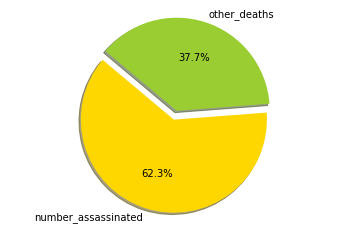

In [88]:
# Data to plot
labels = 'number_assassinated', 'other_deaths'
sizes = [215, 130]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

#Question 10 Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009. Don't forget to label your axes! Color each dot according to its year.

In [2]:

import pandas as pd
arcade_revenue_vs_cs_doctorates_csv = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

# Import plotly and create a figure
import plotly.graph_objects as go
fig = go.Figure()



# Add the scatter traces to the figure
for column_header in ['Total Arcade Revenue (billions)', 'Computer Science Doctorates Awarded (US)']:
    fig.add_trace(go.Scatter(
        x=arcade_revenue_vs_cs_doctorates_csv['Year'],
        y=arcade_revenue_vs_cs_doctorates_csv[column_header],
        mode='markers',
        name=str(column_header)
    ))

# Update the layout
fig.update_layout(
    xaxis_title="Year",
    yaxis_title="",
    title="Year, Total Arcade Revenue (billions), Computer Science Doctorates Awarded (US) scatter plot",
)
fig.show(renderer="iframe")